# Data transforms

In [1]:
# Libraries

## Basic libraries
import numpy as np
import pandas as pd
import seaborn as sns

import math
from numpy import mean 
from numpy import std
from numpy import percentile 
# from scipy.stats import iqr

## Plotting
import matplotlib.pyplot as plt

from pandas import read_csv
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2
from matplotlib import pyplot

## How to Scale Numerical Data

📌 **Why Scale Numerical Data?**
- Many ML algorithms perform better with scaled data.
- Algorithms affected:<br>
o	**Weighted-sum models**: Linear Regression, Logistic Regression, Neural Networks.<br>
o	**Distance-based models**: KNN, SVM.<br>
- Algorithms unaffected: Decision Trees, Random Forests.
- Scaling helps:<br>
o	Prevent instability from large weights.<br>
o	Improve convergence and performance.<br>
o	Normalize gradients in neural networks.<br>

🔢 **Two Main Scaling Techniques**<br><br>
🔹 **Normalization (Min-Max Scaling)**<br>
- **Range**: Scales values to **[0, 1]**.
- Formula: **y = (x - min) / (max - min)**<br>
- Assumes known or estimable min and max.
- Sensitive to **outliers**.
- Use **MinMaxScaler** from scikit-learn.<br><br>
  
🔹 **Standardization (Z-score Scaling)**<br>
- **Range**: Mean = 0, Standard Deviation = 1.
- Formula: **y = (x - mean) / standard_deviation**<br>
- More **robust** to outliers.
- Assumes **Gaussian distribution** (but works without it).
- Use **StandardScaler** from scikit-learn.

🛠️ **How to Apply Scaling (Best Practice)**<br>
1. **Fit** the scaler on **training data** only.
2.	**Transform** the training and future data.
3.	Optionally **inverse transform** for interpretation.

❓ **Common Questions**<br>
- **Normalize vs Standardize?**<br>
o	Normalize if distribution is unknown or not Gaussian.<br>
o	Standardize if distribution is Gaussian or spread is wide.<br><br>
- **Standardize then Normalize?**<br>
o	Optional. Useful if mixing scaled data types or using distance-based models.<br><br>
- **Which is best?**<br>
o	No universal answer. Test both and compare performance.<br><br>
- **Out-of-bounds values?**<br>
o	Clamp to training min/max or set bounds manually.

✅ **Key Takeaways**
- **Scaling improves model performance and stability.**
- **Choose scaling based on data characteristics and model type.**
- Always **evaluate impact of scaling on performance.**

### Diabetes Dataset

(768, 9)
                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000

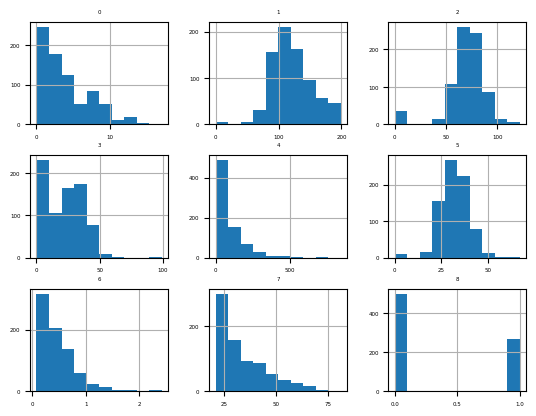

In [2]:
# load and summarize the diabetes dataset 
from pandas import read_csv
from matplotlib import pyplot 

# load the dataset
path_diabetes= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
dataset = read_csv(path_diabetes, header=None) 

# summarize the shape of the dataset
print(dataset.shape)

# summarize each variable 
print(dataset.describe())

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4) 
[x.title.set_size(4)  for  x  in  fig.ravel()]

# show the plot 
pyplot.show()

Next, let’s fit and evaluate a machine learning model on the raw dataset. We will use a k-nearest neighbor algorithm with default hyperparameters and evaluate it using repeated stratified k-fold cross-validation. The complete example is listed below.

In [3]:
# evaluate knn on the raw diabetes dataset 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder 

# load the dataset
path_diabetes= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
dataset = read_csv(path_diabetes, header=None) 
data = dataset.values

# separate into input and output columns 
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y  =  LabelEncoder().fit_transform(y.astype('str'))

# define and configure the model
model = KNeighborsClassifier() 

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.717 (0.040)


### MinMaxScaler Transform

🔹 **Normalization (Min-Max Scaling)**<br>
- **Range**: Scales values to **[0, 1]**.
- Formula: **y = (x - min) / (max - min)**<br>
- Assumes known or estimable min and max.
- Sensitive to **outliers**.
- Use **MinMaxScaler** from scikit-learn.<br><br>

                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     0.226180    0.607510    0.566438    0.207439    0.094326    0.476790   
std      0.198210    0.160666    0.158654    0.161134    0.136222    0.117499   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.058824    0.497487    0.508197    0.000000    0.000000    0.406855   
50%      0.176471    0.587940    0.590164    0.232323    0.036052    0.476900   
75%      0.352941    0.704774    0.655738    0.323232    0.150414    0.545455   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

                6           7  
count  768.000000  768.000000  
mean     0.168179    0.204015  
std      0.141473    0.196004  
min      0.000000    0.000000  
25%      0.070773    0.050000  
50%      0.125747    0.133333  
75%      0.234095    0.333333  
max      1.000

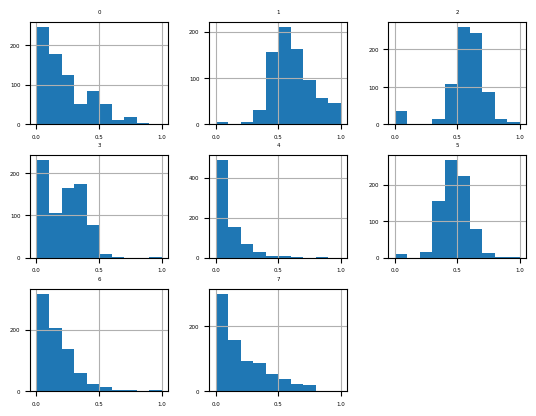

In [4]:
# visualize a minmax scaler transform of the diabetes dataset 
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import MinMaxScaler 
from matplotlib import pyplot

# load the dataset
path_diabetes= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
dataset = read_csv(path_diabetes, header=None) 

# retrieve just the numeric input values
data = dataset.values[:, :-1]

# perform a robust scaler transform of the dataset 
trans = MinMaxScaler()
data = trans.fit_transform(data)

# convert the array back to a dataframe 
dataset = DataFrame(data)

# summarize 
print(dataset.describe())

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4) 
[x.title.set_size(4) for x in fig.ravel()]

# show the plot 
pyplot.show()

Next, let’s evaluate the same KNN model as the previous section, but in this case, on a MinMaxScaler transform of the dataset. The complete example is listed below.

In [5]:
# evaluate knn on the diabetes dataset with minmax scaler transform 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.pipeline import Pipeline

# load the dataset
path_diabetes= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
dataset = read_csv(path_diabetes, header=None) 
data = dataset.values

# separate into input and output columns 
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y  =  LabelEncoder().fit_transform(y.astype('str')) 

# define the pipeline
trans = MinMaxScaler()
model  =  KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)]) 

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.739 (0.053)


### StandardScaler Transform

🔹 **Standardization (Z-score Scaling)**<br>
- **Range**: Mean = 0, Standard Deviation = 1.
- Formula: **y = (x - mean) / standard_deviation**<br>
- More **robust** to outliers.
- Assumes **Gaussian distribution** (but works without it).
- Use **StandardScaler** from scikit-learn.

                  0             1             2             3             4  \
count  7.680000e+02  7.680000e+02  7.680000e+02  7.680000e+02  7.680000e+02   
mean  -6.476301e-17 -9.251859e-18  1.503427e-17  1.006140e-16 -3.006854e-17   
std    1.000652e+00  1.000652e+00  1.000652e+00  1.000652e+00  1.000652e+00   
min   -1.141852e+00 -3.783654e+00 -3.572597e+00 -1.288212e+00 -6.928906e-01   
25%   -8.448851e-01 -6.852363e-01 -3.673367e-01 -1.288212e+00 -6.928906e-01   
50%   -2.509521e-01 -1.218877e-01  1.496408e-01  1.545332e-01 -4.280622e-01   
75%    6.399473e-01  6.057709e-01  5.632228e-01  7.190857e-01  4.120079e-01   
max    3.906578e+00  2.444478e+00  2.734528e+00  4.921866e+00  6.652839e+00   

                  5             6             7  
count  7.680000e+02  7.680000e+02  7.680000e+02  
mean   2.590520e-16  2.451743e-16  1.931325e-16  
std    1.000652e+00  1.000652e+00  1.000652e+00  
min   -4.060474e+00 -1.189553e+00 -1.041549e+00  
25%   -5.955785e-01 -6.889685e-01 -7.8

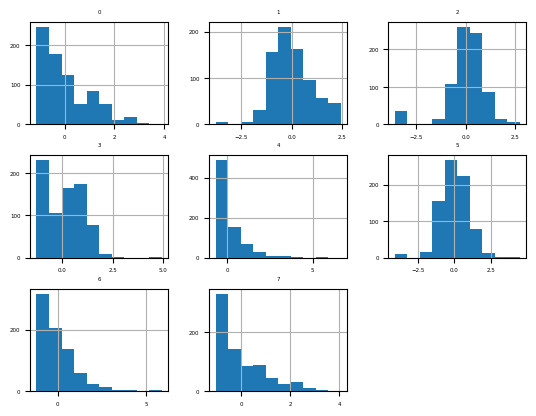

In [6]:
# visualize a standard scaler transform of the diabetes dataset 
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler 
from matplotlib import pyplot

# load the dataset
path_diabetes= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
dataset = read_csv(path_diabetes, header=None) 

# retrieve just the numeric input values
data = dataset.values[:, :-1]

# perform a robust scaler transform of the dataset
trans = StandardScaler()
data = trans.fit_transform(data)

# convert the array back to a dataframe 
dataset = DataFrame(data)
# summarize 
print(dataset.describe())

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]

# show the plot 
pyplot.show()

Next, let’s evaluate the same KNN model as the previous section, but in this case, on a StandardScaler transform of the dataset. The complete example is listed below.

In [7]:
# evaluate knn on the diabetes dataset with standard scaler transform 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline

# load the dataset
path_diabetes= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
dataset = read_csv(path_diabetes, header=None) 
data = dataset.values

# separate into input and output columns 
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y  =  LabelEncoder().fit_transform(y.astype('str')) 

# define the pipeline
trans = StandardScaler()
model  =  KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)]) 

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.741 (0.050)


## How to Scale Data With Outliers

📌 **Why Scale Data?**
- Many ML algorithms perform better with scaled numerical input.
- Algorithms like linear regression, KNN, SVM, and neural networks are sensitive to feature scale.
- Large-valued features can dominate and bias model learning.

⚠️ **Problem with Standard Scaling**
- **Standardization** = subtract mean + divide by standard deviation.
- Works best with normally (Gaussian) distributed features.
- Fails with **outliers** – they skew mean and standard deviation.

✅ **Solution: Robust Scaling**
- Use **median** and **IQR (Interquartile Range)** instead of mean and std.
- Called **Robust Scaling** – less sensitive to outliers.
- Transforms:<br>
o	Subtract the median (centering)<br>
o	Divide by IQR (scaling)<br>
- Result: distribution centered at 0, with unit-scale, preserving outliers.

🛠️ **Using RobustScaler in Python (scikit-learn)**
- RobustScaler() available in sklearn.preprocessing.
- Parameters:<br>
o	**with_centering**=True: subtract median<br>
o	**with_scaling**=True: divide by IQR<br>
o	**quantile_range**=(25, 75): default IQR range, can be customized

🧠 **Key Takeaways for Data Scientists**
- Always consider feature scaling before training models.
- Prefer **RobustScaler** when data has **outliers**.
- Tune quantile_range for better performance – no one-size-fits-all.
- Evaluate scaling impacts using cross-validation.

#### Diabetes Dataset

(768, 9)
                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000

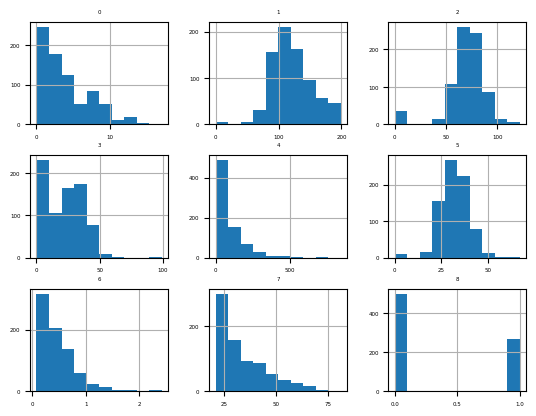

In [8]:
# load and summarize the diabetes dataset 
from pandas import read_csv
from matplotlib import pyplot 

# load the dataset
path_diabetes= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
dataset = read_csv(path_diabetes, header=None) 

# summarize the shape of the dataset
print(dataset.shape)

# summarize each variable 
print(dataset.describe())

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4) 
[x.title.set_size(4)  for  x  in  fig.ravel()]

# show the plot 
pyplot.show()

Next, let’s fit and evaluate a machine learning model on the raw dataset. <br>We will use a k-nearest neighbor algorithm with default hyperparameters and evaluate it using repeated stratified k-fold cross-validation. <br>The complete example is listed below.

In [9]:
# evaluate knn on the raw diabetes dataset 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder 

# load the dataset
path_diabetes= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
dataset = read_csv(path_diabetes, header=None) 
data = dataset.values

# separate into input and output columns 
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y  =  LabelEncoder().fit_transform(y.astype('str'))

# define and configure the model
model = KNeighborsClassifier() 

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.717 (0.040)


#### IQR Robust Scaler Transform

✅ **Solution: Robust Scaling**
- Use **median** and **IQR (Interquartile Range)** instead of mean and std.
- Called **Robust Scaling** – less sensitive to outliers.
- Transforms:<br>
o	Subtract the median (centering)<br>
o	Divide by IQR (scaling)<br>
- Result: distribution centered at 0, with unit-scale, preserving outliers.

🛠️ **Using RobustScaler in Python (scikit-learn)**
- RobustScaler() available in sklearn.preprocessing.
- Parameters:<br>
o	**with_centering**=True: subtract median<br>
o	**with_scaling**=True: divide by IQR<br>
o	**quantile_range**=(25, 75): default IQR range, can be customized

                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     0.169010    0.094413   -0.160807   -0.076986    0.387422   -0.000798   
std      0.673916    0.775094    1.075323    0.498507    0.905650    0.847759   
min     -0.600000   -2.836364   -4.000000   -0.718750   -0.239686   -3.440860   
25%     -0.400000   -0.436364   -0.555556   -0.718750   -0.239686   -0.505376   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.600000    0.563636    0.444444    0.281250    0.760314    0.494624   
max      2.800000    1.987879    2.777778    2.375000    6.408644    3.774194   

                6           7  
count  768.000000  768.000000  
mean     0.259807    0.249464  
std      0.866219    0.691778  
min     -0.769935   -0.470588  
25%     -0.336601   -0.294118  
50%      0.000000    0.000000  
75%      0.663399    0.705882  
max      5.352

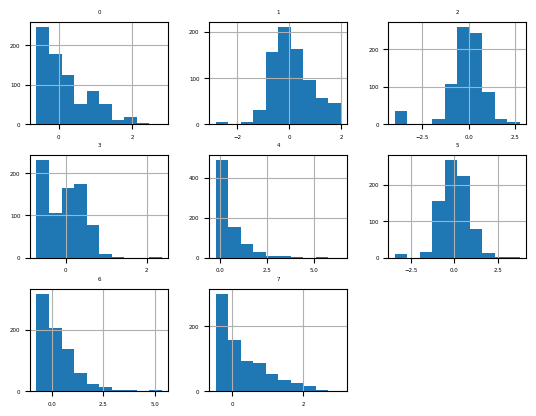

In [10]:
# visualize a robust scaler transform of the diabetes dataset 
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import RobustScaler 
from matplotlib import pyplot

# load dataset
path_diabetes= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
dataset = read_csv(path_diabetes, header=None) 

# retrieve just the numeric input values
data = dataset.values[:, :-1]

# perform a robust scaler transform of the dataset 
trans = RobustScaler()
data = trans.fit_transform(data)

# convert the array back to a dataframe
dataset = DataFrame(data) 

# summarize
print(dataset.describe())

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4) 
[x.title.set_size(4) for x in fig.ravel()]

# show the plot 
pyplot.show()

Next, let’s evaluate the same KNN model as the previous section, but in this case on a robust scaler transform of the dataset. <br>The complete example is listed below.

In [11]:
# evaluate knn on the diabetes dataset with robust scaler transform 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import RobustScaler 
from sklearn.pipeline import Pipeline

# load dataset
path_diabetes= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
dataset = read_csv(path_diabetes, header=None) 
data = dataset.values

# separate into input and output columns 
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y  =  LabelEncoder().fit_transform(y.astype('str'))

# define the pipeline
trans = RobustScaler()
model  =  KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)]) 

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.734 (0.044)


Next, let’s explore the effect of different scaling ranges.

#### Explore Robust Scaler Range

🛠️ **Using RobustScaler in Python (scikit-learn)**
- RobustScaler() available in sklearn.preprocessing.
- Parameters:<br>
o	**with_centering**=True: subtract median<br>
o	**with_scaling**=True: divide by IQR<br>
o	**quantile_range**=(25, 75): default IQR range, can be customized

>1 0.734 (0.054)
>5 0.736 (0.051)
>10 0.739 (0.047)
>15 0.740 (0.045)
>20 0.734 (0.050)
>25 0.734 (0.044)
>30 0.735 (0.042)


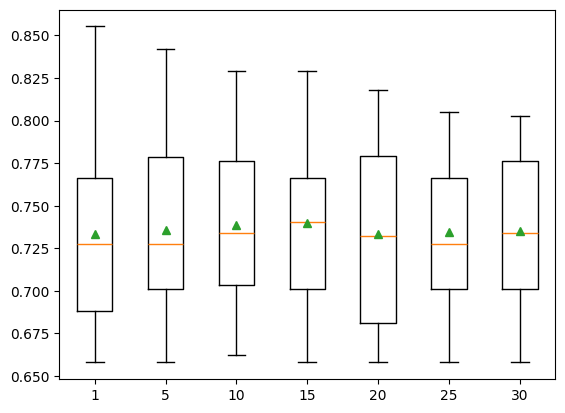

In [12]:
# explore the scaling range of the robust scaler transform 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler 
from sklearn.preprocessing import LabelEncoder 
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get the dataset 
def get_dataset():
    # load dataset
    path_diabetes= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
    dataset = read_csv(path_diabetes, header=None)     
    data = dataset.values
    # separate into input and output columns
    X, y = data[:, :-1], data[:, -1]
    # ensure inputs are floats and output is an integer label
    X = X.astype('float32')
    y = LabelEncoder().fit_transform(y.astype('str')) 
    return X, y

# get a list of models to evaluate 
def get_models():
    models = dict()
    for value in [1, 5, 10, 15, 20, 25, 30]:
        # define the pipeline
        trans = RobustScaler(quantile_range=(value, 100-value)) 
        model = KNeighborsClassifier()
        models[str(value)] = Pipeline(steps=[('t', trans), ('m', model)]) 
    return models

# evaluate a given model using cross-validation 
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
    return scores


# define dataset
X, y = get_dataset()

# get the models to evaluate 
models = get_models()

# evaluate the models and store results 
results, names = list(), list()

for name, model in models.items():
    scores = evaluate_model(model, X, y) 
    results.append(scores) 
    names.append(name)
    print('>%s %.3f (%.3f)'  % (name, mean(scores), std(scores))) 

# plot model performance for comparison 
pyplot.boxplot(results, tick_labels=names, showmeans=True) 
pyplot.show()

## How to Encode Categorical Data

📌 **Core Principle**
- Machine learning models require **numeric input/output**.
- **Categorical data must be encoded** to numeric form before modeling.

📚 **Types of Variables**
- **Nominal Variable**: Categories without order (e.g., red, green, blue).
- **Ordinal Variable**: Categories with order/rank (e.g., low, medium, high).

🛠️ **Encoding Techniques**<br>
- **Ordinal Encoding**<br>
o	Maps categories to integers (e.g., red=1, green=2).<br>
o	Use **only** if categories have a **natural order**.<br>
o	Can be misleading for **nominal variables**.<br>
o	Implemented via OrdinalEncoder (scikit-learn).<br>
o	For target labels: use LabelEncoder.<br><br>

- **One Hot Encoding**<br>
o	Creates binary column for each category.<br>
o	Suitable for **nominal data** (no rank/order).<br>
o	Avoids incorrect ordinal assumptions.<br>
o	Implemented via OneHotEncoder.<br>
o	Can handle **unknown categories** with **handle_unknown='ignore'**.<br>
o	Can produce **sparse** matrix; **set sparse=False to get full matrix.**<br><br>


- **Dummy Variable Encoding**<br>
o	Like one hot, but drops one column to avoid redundancy.<br>
o	Use with **regression models** (e.g., linear regression).<br>
o	Controlled via drop='first' in OneHotEncoder.<br>

🤔 **Common Questions**
- **Mixed Data Types?**<br>
o	Encode each column separately.<br>
o	Use ColumnTransformer for automated handling.<br><br>
- **High Cardinality?**<br>
o	One hot encoding can still work with thousands of categories.<br>
o	Models can handle large feature vectors.<br><br>
- **Best Encoding Method?**<br>
o	**No universal answer**—must **experiment** with each method on your dataset.<br>

🧩 **Key Takeaways**
- Encoding is **essential preprocessing**.
- Match encoding method to **variable type** (ordinal vs nominal).
- **Always test** encoding methods with your specific model and dataset.

#### Breast Cancer Dataset

In [13]:
# load and summarize the dataset 
from pandas import read_csv

# load the dataset
path_breast_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv"
dataset = read_csv(path_breast_data, header=None) 

# retrieve the array of data
data = dataset.values

# separate into input and output columns
X = data[:, :-1].astype(str)
y = data[:, -1].astype(str) 

# summarize
print('Input', X.shape) 
print('Output', y.shape)

Input (286, 9)
Output (286,)


#### OrdinalEncoder Transform

- **Ordinal Encoding**<br>
o	Maps categories to integers (e.g., red=1, green=2).<br>
o	Use **only** if categories have a **natural order**.<br>
o	Can be misleading for **nominal variables**.<br>
o	Implemented via **OrdinalEncoder** (scikit-learn).<br>
o	For target labels: use **LabelEncoder**.<br><br>

In [14]:
# ordinal encode the breast cancer dataset 
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OrdinalEncoder 

# load the dataset
path_breast_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv"
dataset = read_csv(path_breast_data, header=None) 

# retrieve the array of data
data = dataset.values

# separate into input and output columns
X = data[:, :-1].astype(str)
y = data[:, -1].astype(str)

# ordinal encode input variables 
ordinal_encoder = OrdinalEncoder()
X = ordinal_encoder.fit_transform(X) 

# ordinal encode target variable 
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y) 

# summarize the transformed data 
print('Input', X.shape) 
print(X[:5, :])

print('Output', y.shape) 
print(y[:5])

Input (286, 9)
[[2. 2. 2. 0. 1. 2. 1. 2. 0.]
 [3. 0. 2. 0. 0. 0. 1. 0. 0.]
 [3. 0. 6. 0. 0. 1. 0. 1. 0.]
 [2. 2. 6. 0. 1. 2. 1. 1. 1.]
 [2. 2. 5. 4. 1. 1. 0. 4. 0.]]
Output (286,)
[1 0 1 0 1]


We can then fit a logistic regression algorithm on the training dataset and evaluate it on the test dataset. The complete example is listed below.

In [15]:
#evaluate logistic regression on the breast cancer dataset with an ordinal encoding 
from pandas import read_csv
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.metrics import accuracy_score

# load the dataset
path_breast_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv"
dataset = read_csv(path_breast_data, header=None) 

# retrieve the array of data
data = dataset.values

# separate into input and output columns
X = data[:, :-1].astype(str)
y = data[:, -1].astype(str)

# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

# ordinal encode input variables
ordinal_encoder = OrdinalEncoder() 
ordinal_encoder.fit(X_train)
X_train = ordinal_encoder.transform(X_train) 
X_test = ordinal_encoder.transform(X_test)

# ordinal encode target variable 
label_encoder = LabelEncoder() 
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train) 
y_test = label_encoder.transform(y_test)

# define the model
model = LogisticRegression() 

# fit on the training set
model.fit(X_train, y_train)

# predict on test set
yhat = model.predict(X_test) 

# evaluate predictions
accuracy = accuracy_score(y_test, yhat) 
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 75.79


#### OneHotEncoder Transform

- **One Hot Encoding**<br>
o	Creates binary column for each category.<br>
o	Suitable for **nominal data** (no rank/order).<br>
o	Avoids incorrect ordinal assumptions.<br>
o	Implemented via **OneHotEncoder**.<br>
o	Can handle **unknown categories** with **handle_unknown='ignore'**.<br>
o	Can produce **sparse** matrix; **set sparse=False to get full matrix.**<br><br>

In [16]:
# one-hot encode the breast cancer dataset 
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder 

# load the dataset
path_breast_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv"
dataset = read_csv(path_breast_data, header=None) 

# retrieve the array of data
data = dataset.values

# separate into input and output columns
X = data[:, :-1].astype(str)
y = data[:, -1].astype(str)

# one hot encode input variables 
onehot_encoder = OneHotEncoder(sparse_output=False)
X = onehot_encoder.fit_transform(X) 

# ordinal encode target variable 
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y) 

# summarize the transformed data 
print('Input', X.shape) 
print(X[:5, :])

Input (286, 43)
[[0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0.]]


Next, let’s evaluate machine learning on this dataset with this encoding as we did in the previous section. The encoding is fit on the training set then applied to both train and test sets as before.

In [17]:
# evaluate logistic regression on the breast cancer dataset with a one-hot encoding 
from pandas import read_csv
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

# load the dataset
path_breast_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv"
dataset = read_csv(path_breast_data, header=None) 

# retrieve the array of data
data = dataset.values

# separate into input and output columns
X = data[:, :-1].astype(str)
y = data[:, -1].astype(str)

# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

# one-hot encode input variables
onehot_encoder = OneHotEncoder() 
onehot_encoder.fit(X_train)
X_train = onehot_encoder.transform(X_train) 
X_test = onehot_encoder.transform(X_test)

# ordinal encode target variable 
label_encoder = LabelEncoder() 
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train) 
y_test = label_encoder.transform(y_test)

# define the model
model = LogisticRegression() 

# fit on the training set 
model.fit(X_train,  y_train) 

# predict on test set
yhat = model.predict(X_test) 

# evaluate predictions
accuracy = accuracy_score(y_test, yhat) 
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 70.53


## How to Make Distributions More Gaussian

🧠 **Why Gaussian Distributions Matter** <br>
- Many ML algorithms **assume** or perform better with **Gaussian (normal) distributions**.<br>
o	Examples: Linear Regression, Logistic Regression, Gaussian Naive Bayes.<br>
- **Even nonlinear algorithms benefit from Gaussian-like input distributions.**
- Applies to both input features and output targets (especially in regression tasks).

⚙️ **What are Power Transforms?**
- Used to **make data more Gaussian-like**.
- Aim to **remove skew** and **stabilize variance**.
- Automatically find the best transformation via a parameter (**λ** or **lambda**).
- Two main types:<br>
o	**Box-Cox Transform**: requires strictly positive data.<br>
o	**Yeo-Johnson Transform**: handles both positive and negative values.<br>

🔧 **PowerTransformer in Scikit-Learn**
- **PowerTransformer(method='box-cox' | 'yeo-johnson')**
- **Auto-standardizes output** (zero mean, unit variance); disable with standardize=False.
- Saves λ parameter for consistent future transformations (e.g., on test data).

🧮 **Lambda (λ) Values in Power Transforms**
- λ = −1.0 → reciprocal transform
- λ = −0.5 → reciprocal square root
- λ = 0.0 → log transform
- λ = 0.5 → square root
- λ = 1.0 → no transform

📈 **Box-Cox Transform**
- **Strictly positive values only** (no 0 or negatives).
- Error if used on raw sonar data (contains 0s).
- Solution: Use MinMaxScaler before PowerTransformer(method='box-cox').

📉 **Yeo-Johnson Transform**
- **Supports 0 and negative values.**
- No need to scale before applying.
- Further boost with standardization before Yeo-Johnson

✅ **Key Takeaways (Summary)**
- **Gaussian-shaped data boosts model performance.**
- **Power transforms** help achieve Gaussian-like distributions:<br>
o	Use **Box-Cox** for **strictly positive data.**<br>
o	Use **Yeo-Johnson** for **general-purpose transformation.**<br>
- PowerTransformer in scikit-learn makes applying these easy and consistent.
- Combine with **pipelines** for scalable, reusable data preparation workflows.

#### Power transforms

⚙️ **What are Power Transforms?**
- Used to **make data more Gaussian-like**.
- Aim to **remove skew** and **stabilize variance**.
- Automatically find the best transformation via a parameter (**λ** or **lambda**).
- Two main types:<br>
o	**Box-Cox Transform**: requires strictly positive data.<br>
o	**Yeo-Johnson Transform**: handles both positive and negative values.<br>

🔧 **PowerTransformer in Scikit-Learn**
- **PowerTransformer(method='box-cox' | 'yeo-johnson')**
- **Auto-standardizes output** (zero mean, unit variance); disable with standardize=False.
- Saves λ parameter for consistent future transformations (e.g., on test data).

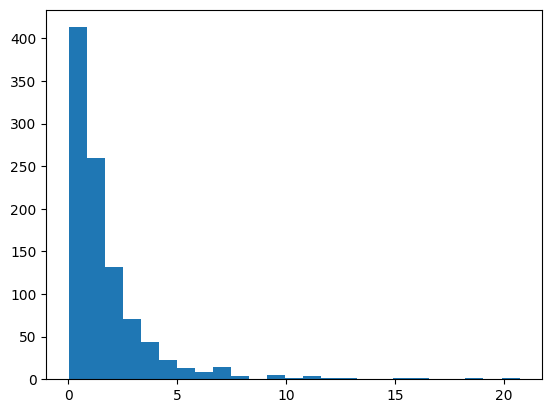

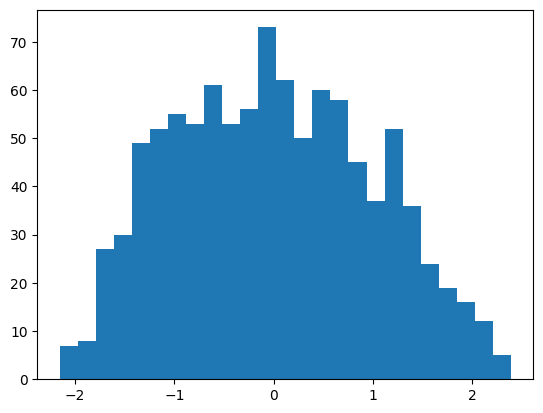

In [18]:
# demonstration of the power transform on data with a skew 
from numpy import exp
from numpy.random import randn
from sklearn.preprocessing import PowerTransformer 
from matplotlib import pyplot

# generate gaussian data sample 
data = randn(1000)

# add a skew to the data distribution 
data = exp(data)

# histogram of the raw data with a skew 
pyplot.hist(data,  bins=25) 
pyplot.show()

# reshape data to have rows and columns 
data  =  data.reshape((len(data),1))

# power transform the raw data
power = PowerTransformer(method='yeo-johnson', standardize=True) 
data_trans = power.fit_transform(data)

# histogram of the transformed data
pyplot.hist(data_trans, bins=25) 
pyplot.show()

#### Sonar dataset

The sonar dataset is a standard machine learning dataset for binary classification. It involves 60 real-valued inputs and a two-class target variable. There are 208 examples in the dataset and the classes are reasonably balanced. A baseline classification algorithm can achieve a classification accuracy of about 53.4 percent using repeated stratified 10-fold cross-validation. Top performance on this dataset is about 88 percent using repeated stratified 10-fold cross- validation. The dataset describes sonar returns of rocks or simulated mines. 

(208, 61)


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


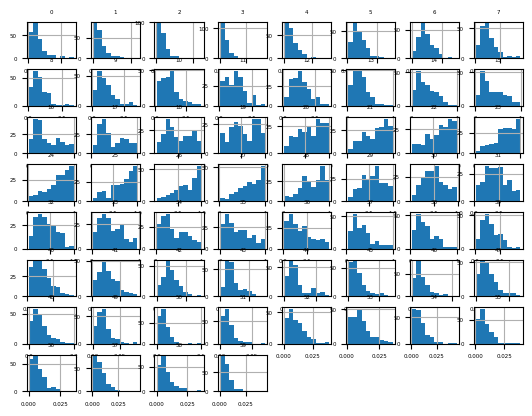

In [19]:
# load and summarize the sonar dataset 
from pandas import read_csv
from matplotlib import pyplot 

# load dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(path_sonar_data, header=None) 

# summarize the shape of the dataset 
print(dataset.shape)

# summarize each variable 
display(dataset.describe())

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4) 
[x.title.set_size(4) for x in fig.ravel()]
# show the plot 
pyplot.show()


Next, let’s fit and evaluate a machine learning model on the raw dataset. <br>We will use a k-nearest neighbor algorithm with default hyperparameters and evaluate it using repeated stratified k-fold cross-validation. <br>The complete example is listed below.

In [20]:
# evaluate knn on the raw sonar dataset 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder 

# load dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(path_sonar_data, header=None) 
data = dataset.values

# separate into input and output columns 
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y  =  LabelEncoder().fit_transform(y.astype('str')) 

# define and configure the model
model = KNeighborsClassifier()

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.797 (0.073)


#### Box-Cox Transform

📈 **Box-Cox Transform**
- **Strictly positive values only** (no 0 or negatives).
- Error if used on raw sonar data (contains 0s).
- Solution: Use MinMaxScaler before PowerTransformer(method='box-cox').

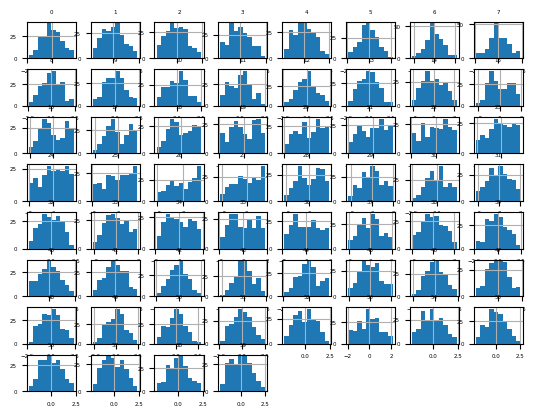

In [21]:
# visualize a box-cox transform of the scaled sonar dataset 
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.pipeline import Pipeline
from matplotlib import pyplot 

# Load dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(path_sonar_data, header=None) 

# retrieve just the numeric input values 
data = dataset.values[:, :-1]

# perform a box-cox transform of the dataset 
scaler = MinMaxScaler(feature_range=(1, 2)) 
power = PowerTransformer(method='box-cox')
pipeline = Pipeline(steps=[('s', scaler),('p', power)]) 
data = pipeline.fit_transform(data)

# convert the array back to a dataframe 
dataset = DataFrame(data)

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()] 

# show the plot
pyplot.show()

Running the example transforms the dataset and plots histograms of each input variable. We can see that the shape of the histograms for each variable looks more Gaussian than the raw data.

Next, let’s evaluate the same KNN model as the previous section, but in this case on a Box-Cox transform of the scaled dataset. The complete example is listed below.

In [22]:
# evaluate knn on the box-cox sonar dataset 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline 

# load dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(path_sonar_data, header=None) 
data = dataset.values

# separate into input and output columns 
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y  =  LabelEncoder().fit_transform(y.astype('str')) 

# define the pipeline
scaler = MinMaxScaler(feature_range=(1, 2)) 
power = PowerTransformer(method='box-cox') 
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('s', scaler),('p', power), ('m', model)]) 

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.811 (0.085)


Running the example, we can see that the Box-Cox transform results in a lift in performance from 79.7 percent accuracy without the transform to about 81.1 percent with the transform.

#### Yeo-Johnson Transform

📉 **Yeo-Johnson Transform**
- **Supports 0 and negative values.**
- No need to scale before applying.
- Further boost with standardization before Yeo-Johnson

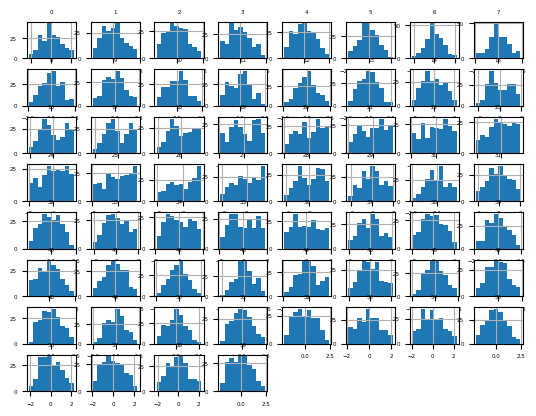

In [23]:
# visualize a yeo-johnson transform of the sonar dataset 
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import PowerTransformer 
from matplotlib import pyplot

# Load dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(path_sonar_data, header=None)

# retrieve just the numeric input values 
data = dataset.values[:, :-1]

# perform a yeo-johnson transform of the dataset 
pt = PowerTransformer(method='yeo-johnson')
data = pt.fit_transform(data)

# convert the array back to a dataframe 
dataset = DataFrame(data)

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4) 
[x.title.set_size(4)  for  x  in  fig.ravel()]

# show the plot 
pyplot.show()

Running the example transforms the dataset and plots histograms of each input variable. We can see that the shape of the histograms for each variable look more Gaussian than the raw data, much like the Box-Cox transform.

Next, let’s evaluate the same KNN model as the previous section, but in this case on a Yeo-Johnson transform of the raw dataset. The complete example is listed below.

In [24]:
# evaluate knn on the yeo-johnson sonar dataset 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import PowerTransformer 
from sklearn.pipeline import Pipeline

# load dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(path_sonar_data, header=None)
data = dataset.values

# separate into input and output columns 
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y  =  LabelEncoder().fit_transform(y.astype('str')) 

# define the pipeline
power = PowerTransformer(method='yeo-johnson') 
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('p', power), ('m', model)])

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.808 (0.082)


Running the example, we can see that the Yeo-Johnson transform results in a lift in performance from 79.7 percent accuracy without the transform to about 80.8 percent with the transform, less than the Box-Cox transform that achieved about 81.1 percent.

Sometimes a lift in performance can be achieved by first standardizing the raw dataset prior to performing a Yeo-Johnson transform. We can explore this **by adding a StandardScaler** as a first step in the pipeline. The complete example is listed below.

In [25]:
#evaluate knn on the yeo-johnson standardized sonar dataset 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline

# load dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(path_sonar_data, header=None)
data = dataset.values

# separate into input and output columns 
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y  =  LabelEncoder().fit_transform(y.astype('str'))

# define the pipeline
scaler = StandardScaler()
power = PowerTransformer(method='yeo-johnson') 
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('s', scaler), ('p', power), ('m', model)]) 

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.816 (0.077)


## How to Change Numerical Data Distributions

🧠 **Core Idea**
- **Machine learning algorithms often perform better** with **numerical features following a standard distribution**, like **Gaussian (normal)** or **uniform**.

🔁 **Why Change Data Distributions?**<br>
- Real-world data often has:<br>
o	**Skewed distributions** (e.g., exponential)<br>
o	**Outliers**<br>
o	**Multi-modal distributions**<br>
- Algorithms like **linear/logistic regression** assume Gaussian inputs.
- Even non-linear models **can benefit from normalized inputs**.

🔧 **Quantile Transform**
- **Goal**: Map any distribution to **Gaussian** or **uniform**.
- Uses **Quantile Function (inverse CDF)**.
- Implemented in **scikit-learn** via QuantileTransformer.<br><br>
**Parameters**:
- **output_distribution**: 'normal' or 'uniform'
- **n_quantiles**: resolution of mapping (default: 1000; must be < sample size)

🧪 **Insights**<br>
- **Quantile transforms**:<br>
o	Improve **data distribution**<br>
o	Boost **model performance**<br>
- **Tuning n_quantiles** is important:<br>
o	Lower values may yield **higher accuracy**<br>
o	**Explore different values & distributions**<br>

✅ **Key Takeaways**
- Normalize data using quantile transforms for better learning.
- Try both **normal** and **uniform** output distributions.
- Always **experiment with n_quantiles** to optimize performance.

#### Quantile Transforms

🔧 **Quantile Transform**
- **Goal**: Map any distribution to **Gaussian** or **uniform**.
- Uses **Quantile Function (inverse CDF)**.
- Implemented in **scikit-learn** via QuantileTransformer.<br><br>
**Parameters**:
- **output_distribution**: 'normal' or 'uniform'
- **n_quantiles**: resolution of mapping (default: 1000; must be < sample size)

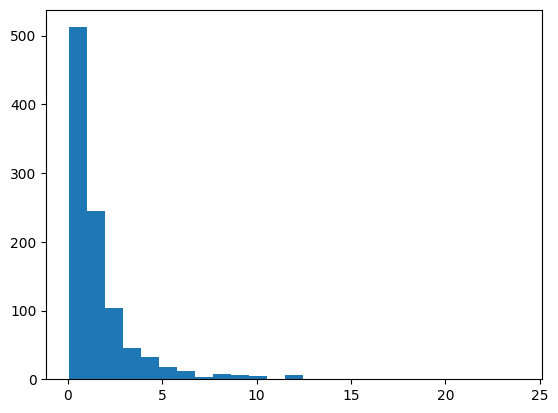

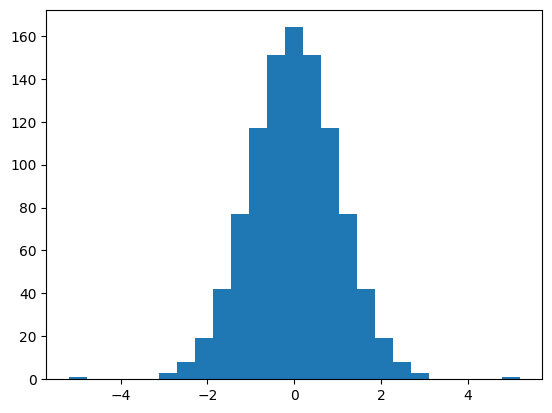

In [26]:
# demonstration of the quantile transform 
from numpy import exp
from numpy.random import randn
from sklearn.preprocessing import QuantileTransformer 
from matplotlib import pyplot

# generate gaussian data sample
data = randn(1000)

# add a skew to the data distribution 
data = exp(data)

# histogram of the raw data with a skew 
pyplot.hist(data,  bins=25) 
pyplot.show()

# reshape data to have rows and columns 
data  =  data.reshape((len(data),1))

# quantile transform the raw data
quantile = QuantileTransformer(output_distribution='normal') 
data_trans = quantile.fit_transform(data)

# histogram of the transformed data 
pyplot.hist(data_trans, bins=25) 
pyplot.show()

Running the example first creates a sample of 1,000 random Gaussian values and adds a skew to the dataset. A histogram is created from the skewed dataset and clearly shows the distribution pushed to the far left.

Then a QuantileTransformer is used to map the data to a Gaussian distribution and standardize the result, centering the values on the mean value of 0 and a standard deviation of 1.0. A histogram of the transform data is created showing a Gaussian shaped data distribution.

#### Sonar dataset

The sonar dataset is a standard machine learning dataset for binary classification. It involves 60 real-valued inputs and a two-class target variable. There are 208 examples in the dataset and the classes are reasonably balanced. A baseline classification algorithm can achieve a classification accuracy of about 53.4 percent using repeated stratified 10-fold cross-validation. Top performance on this dataset is about 88 percent using repeated stratified 10-fold cross- validation. The dataset describes sonar returns of rocks or simulated mines. 

(208, 61)


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


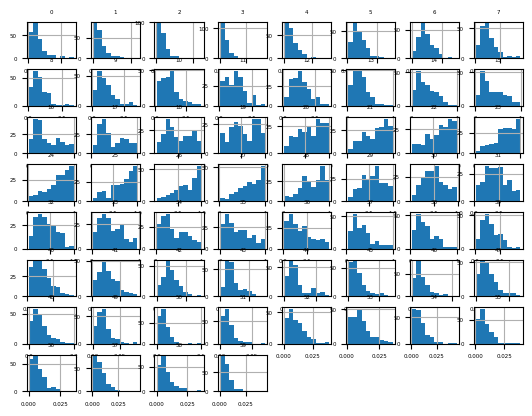

In [27]:
# load and summarize the sonar dataset 
from pandas import read_csv
from matplotlib import pyplot 

# load dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(path_sonar_data, header=None) 

# summarize the shape of the dataset 
print(dataset.shape)

# summarize each variable 
display(dataset.describe())

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4) 
[x.title.set_size(4) for x in fig.ravel()]
# show the plot 
pyplot.show()

Next, let’s fit and evaluate a machine learning model on the raw dataset. <br>We will use a k-nearest neighbor algorithm with default hyperparameters and evaluate it using repeated stratified k-fold cross-validation. <br>The complete example is listed below.

In [28]:
# evaluate knn on the raw sonar dataset 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder 

# load dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(path_sonar_data, header=None) 
data = dataset.values

# separate into input and output columns 
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y  =  LabelEncoder().fit_transform(y.astype('str')) 

# define and configure the model
model = KNeighborsClassifier()

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.797 (0.073)


#### Normal Quantile Transform

It is often desirable to transform an input variable to have a normal probability distribu- tion to improve the modeling performance. We can apply the Quantile transform using the QuantileTransformer class and set the output distribution argument to ‘normal’. We must also set the n quantiles argument to a value less than the number of observations in the training dataset, in this case, 100. Once defined, we can call the fit transform() function and pass it to our dataset to create a quantile transformed version of our dataset.

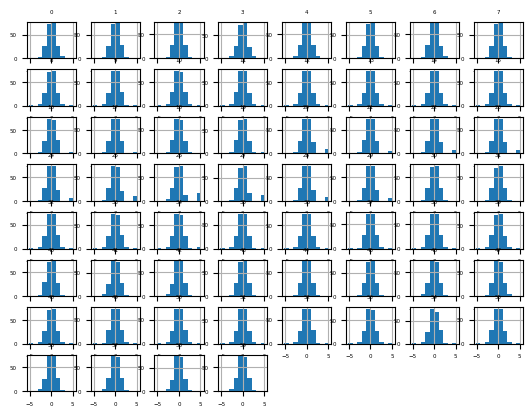

In [29]:
# visualize a normal quantile transform of the sonar dataset 
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import QuantileTransformer 
from matplotlib import pyplot

# load dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(path_sonar_data, header=None) 

# retrieve just the numeric input values 
data = dataset.values[:, :-1]

# perform a normal quantile transform of the dataset
trans = QuantileTransformer(n_quantiles=100, output_distribution='normal') 
data = trans.fit_transform(data)

# convert the array back to a dataframe
dataset = DataFrame(data)

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4) 
[x.title.set_size(4) for x in fig.ravel()]

# show the plot 
pyplot.show()

Running the example transforms the dataset and plots histograms of each input variable. We can see that the shape of the histograms for each variable looks very Gaussian as compared to the raw data.

Next, let’s evaluate the same KNN model as the previous section, but in this case on a normal quantile transform of the dataset. The complete example is listed below.

In [30]:
# evaluate knn on the sonar dataset with normal quantile transform 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import QuantileTransformer 
from sklearn.pipeline import Pipeline

# load dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(path_sonar_data, header=None) 
data = dataset.values

# separate into input and output columns 
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y  =  LabelEncoder().fit_transform(y.astype('str')) 

# define the pipeline
trans = QuantileTransformer(n_quantiles=100, output_distribution='normal')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)]) 

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.817 (0.087)


Running the example, we can see that the normal quantile transform results in a lift in performance from 79.7 percent accuracy without the transform to about 81.7 percent with the transform.

#### Uniform Quantile Transform

Sometimes it can be beneficial to transform a highly exponential or multi-modal distribution to have a uniform distribution. This is especially useful for data with a large and sparse range of values, e.g. outliers that are common rather than rare. We can apply the transform by defining a QuantileTransformer class and setting the output distribution argument to ‘uniform’ (the default).

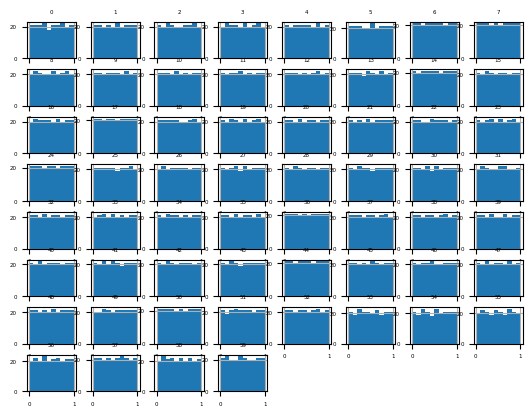

In [31]:
# visualize a uniform quantile transform of the sonar dataset 
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import QuantileTransformer 
from matplotlib import pyplot

# load dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(path_sonar_data, header=None) 

# retrieve just the numeric input values 
data = dataset.values[:, :-1]

# perform a uniform quantile transform of the dataset
trans = QuantileTransformer(n_quantiles=100, output_distribution='uniform') 
data = trans.fit_transform(data)

# convert the array back to a dataframe 
dataset = DataFrame(data)

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4) 
[x.title.set_size(4)  for  x  in  fig.ravel()]

# show the plot 
pyplot.show()

Running the example transforms the dataset and plots histograms of each input variable. We can see that the shape of the histograms for each variable looks very uniform compared to the raw data.

Next, let’s evaluate the same KNN model as the previous section, but in this case on a uniform quantile transform of the raw dataset. The complete example is listed below.

In [32]:
# evaluate knn on the sonar dataset with uniform quantile transform 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import QuantileTransformer 
from sklearn.pipeline import Pipeline

# load dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(path_sonar_data, header=None) 
data = dataset.values

# separate into input and output columns 
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y  =  LabelEncoder().fit_transform(y.astype('str')) 

# define the pipeline
trans = QuantileTransformer(n_quantiles=100, output_distribution='uniform')
model  =  KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)]) 

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.845 (0.074)


Running the example, we can see that the uniform transform results in a lift in performance from 79.7 percent accuracy without the transform to about 84.5 percent with the transform, better than the normal transform that achieved a score of 81.7 percent.

We chose the number of quantiles as an arbitrary number, in this case, 100. This hyperpa- rameter can be tuned to explore the effect of the resolution of the transform on the resulting skill of the model. The example below performs this experiment and plots the mean accuracy for different n quantiles values from 1 to 99.

>1 0.466 (0.016)
>2 0.813 (0.085)
>3 0.840 (0.080)
>4 0.854 (0.075)
>5 0.848 (0.072)
>6 0.851 (0.071)
>7 0.845 (0.071)
>8 0.848 (0.066)
>9 0.848 (0.071)
>10 0.843 (0.074)
>11 0.838 (0.069)
>12 0.838 (0.069)
>13 0.846 (0.071)
>14 0.842 (0.071)
>15 0.845 (0.068)
>16 0.841 (0.074)
>17 0.846 (0.071)
>18 0.842 (0.075)
>19 0.840 (0.075)
>20 0.838 (0.076)
>21 0.843 (0.071)
>22 0.845 (0.073)
>23 0.843 (0.068)
>24 0.845 (0.072)
>25 0.840 (0.077)
>26 0.843 (0.072)
>27 0.842 (0.073)
>28 0.840 (0.076)
>29 0.845 (0.072)
>30 0.840 (0.075)
>31 0.838 (0.076)
>32 0.842 (0.075)
>33 0.843 (0.074)
>34 0.843 (0.075)
>35 0.842 (0.075)
>36 0.843 (0.073)
>37 0.842 (0.075)
>38 0.843 (0.075)
>39 0.840 (0.076)
>40 0.845 (0.074)
>41 0.841 (0.072)
>42 0.842 (0.075)
>43 0.842 (0.074)
>44 0.843 (0.074)
>45 0.840 (0.076)
>46 0.842 (0.075)
>47 0.845 (0.072)
>48 0.842 (0.073)
>49 0.840 (0.073)
>50 0.842 (0.072)
>51 0.842 (0.075)
>52 0.845 (0.071)
>53 0.843 (0.075)
>54 0.845 (0.074)
>55 0.838 (0.076)
>56 0.846 (0.073)
>

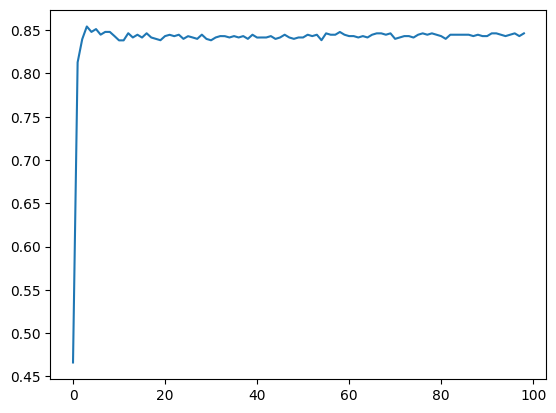

In [33]:
# explore number of quantiles on classification accuracy 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import QuantileTransformer 
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline 
from matplotlib import pyplot

# get the dataset
def get_dataset(filename):
    # load dataset
    dataset = read_csv(filename, header=None)
    data = dataset.values
    # separate into input and output columns 
    X, y = data[:, :-1], data[:, -1]
    # ensure inputs are floats and output is an integer label
    X = X.astype('float32')
    y = LabelEncoder().fit_transform(y.astype('str')) 
    return X, y

# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(1,100):
        # define the pipeline
        trans = QuantileTransformer(n_quantiles=i, output_distribution='uniform') 
        model = KNeighborsClassifier()
        models[str(i)] = Pipeline(steps=[('t', trans), ('m', model)]) 
    return models

# evaluate a given model using cross-validation 
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
    return scores
    
# define dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
X, y = get_dataset(path_sonar_data) 

# get the models to evaluate 
models = get_models()

# evaluate the models and store results 
results = list()

for name, model in models.items():
    scores = evaluate_model(model, X, y) 
    results.append(mean(scores))
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores))) 

# plot model performance for comparison
pyplot.plot(results) 
pyplot.show()

In this case, we can see that surprisingly smaller values resulted in better accuracy, with values such as 4 achieving an accuracy of about 85.4 percent.

A line plot is created showing the number of quantiles used in the transform versus the classification accuracy of the resulting model. We can see a bump with values less than 10 and drop and flat performance after that. <br>**The results highlight that there is likely some benefit in exploring different distributions and number of quantiles to see if better performance can be achieved.**

## How to Transform Numerical to Categorical Data

🔷 **Why Transform Numerical to Categorical (Discretization)?**
- Numerical variables may have **skewed or complex distributions** (e.g., outliers, exponential, multi-modal).
- **ML models perform better** when inputs have **standard or discrete distributions**.
- Some models (e.g., decision trees) prefer **ordinal or categorical inputs**.

🔷 **What is Discretization?**
- Converts **numeric variables into discrete ordinal categories** (a process also known as **binning**).
- Helps **simplify relationships** and **improve performance** of models.
- Can be applied to **inputs or outputs** (features or targets).

🔷**Tool: KBinsDiscretizer (scikit-learn)**
- Transforms numerical values into **k bins** with **ordinal** or **one-hot encoding**.
- **Parameters**:<br>
o	**strategy**: uniform, quantile, or kmeans<br>
o	**n_bins**: number of categories/groups<br>
o	**encode**: ordinal (default), or onehot

🔷 **Discretization Strategies**
1. **Uniform**
- Equal-width bins across the variable’s range.
- Preserves **distribution shape**, but simplifies it into **ordinal levels**.

2. **k-Means**
- Bins based on **clustering** similar values.
- Good for **non-uniform** distributions.

3. **Quantile**
- Equal **number of observations** in each bin (based on percentiles).
- Produces **uniform frequency histograms**.

🔷 **Best Practices**
- Always experiment with different **n_bins values**; optimal performance often requires tuning.
- For ordinal relationships, **ordinal encoding** is preferred.
- For capturing non-ordinal relationships (e.g., kmeans), **onehot encoding** may help.
- Apply discretization **after train-test split** to avoid data leakage.

#### Discretization Transforms

🔷 **Discretization Strategies**
1. **Uniform**
- Equal-width bins across the variable’s range.
- Preserves **distribution shape**, but simplifies it into **ordinal levels**.

2. **k-Means**
- Bins based on **clustering** similar values.
- Good for **non-uniform** distributions.

3. **Quantile**
- Equal **number of observations** in each bin (based on percentiles).
- Produces **uniform frequency histograms**.

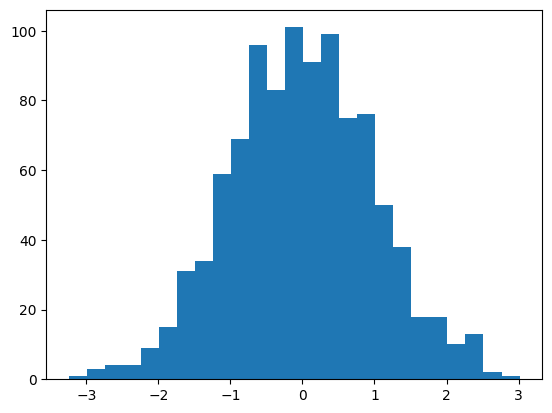

[[6.]
 [6.]
 [6.]
 [3.]
 [7.]
 [4.]
 [5.]
 [6.]
 [5.]
 [3.]]


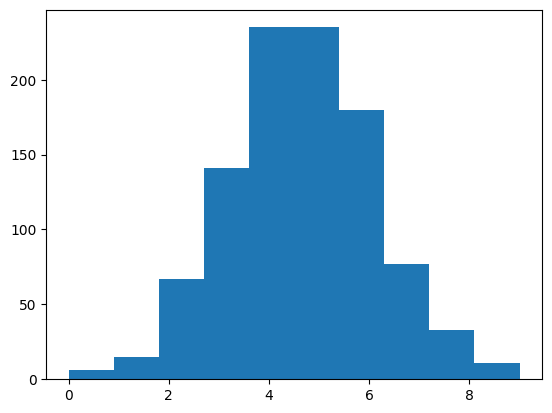

In [34]:
# demonstration of the discretization transform 
from numpy.random import randn
from sklearn.preprocessing import KBinsDiscretizer 
from matplotlib import pyplot

# generate gaussian data sample 
data = randn(1000)

# histogram of the raw data 
pyplot.hist(data, bins=25) 
pyplot.show()

# reshape data to have rows and columns 
data  =  data.reshape((len(data),1))

# discretization transform the raw data
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform', subsample=200_000) 
data_trans = kbins.fit_transform(data)

# summarize first few rows 
print(data_trans[:10, :])

# histogram of the transformed data 
pyplot.hist(data_trans, bins=10) 
pyplot.show()

Running the example first creates a sample of 1,000 random Gaussian floating-point values and plots the data as a histogram.

Next the KBinsDiscretizer is used to map the numerical values to categorical values. We configure the transform to create 10 categories (0 to 9), to output the result in ordinal format (integers) and to divide the range of the input data uniformly. A sample of the transformed data is printed, clearly showing the integer format of the data as expected.

Finally, a histogram is created showing the 10 discrete categories and how the observations are distributed across these groups, following the same pattern as the original data with a Gaussian shape.

#### Sonar Dataset

The sonar dataset is a standard machine learning dataset for binary classification. It involves 60 real-valued inputs and a two-class target variable. There are 208 examples in the dataset and the classes are reasonably balanced. A baseline classification algorithm can achieve a classification accuracy of about 53.4 percent using repeated stratified 10-fold cross-validation. Top performance on this dataset is about 88 percent using repeated stratified 10-fold cross- validation. The dataset describes sonar returns of rocks or simulated mines. 

(208, 61)


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


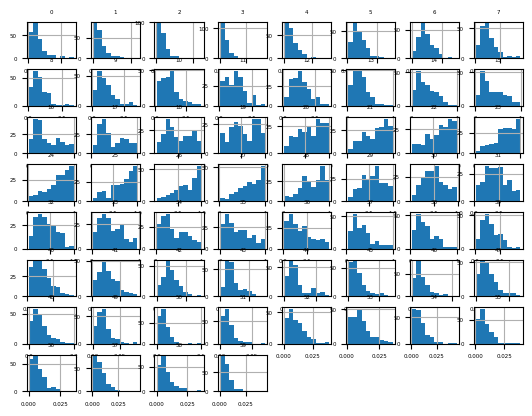

In [35]:
# load and summarize the sonar dataset 
from pandas import read_csv
from matplotlib import pyplot 

# load dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(path_sonar_data, header=None) 

# summarize the shape of the dataset 
print(dataset.shape)

# summarize each variable 
display(dataset.describe())

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4) 
[x.title.set_size(4) for x in fig.ravel()]
# show the plot 
pyplot.show()

Next, let’s fit and evaluate a machine learning model on the raw dataset. <br>We will use a k-nearest neighbor algorithm with default hyperparameters and evaluate it using repeated stratified k-fold cross-validation. <br>The complete example is listed below.

In [36]:
# evaluate knn on the raw sonar dataset 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder 

# load dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(path_sonar_data, header=None) 
data = dataset.values

# separate into input and output columns 
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y  =  LabelEncoder().fit_transform(y.astype('str')) 

# define and configure the model
model = KNeighborsClassifier()

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.797 (0.073)


#### Uniform Discretization Transform

A uniform discretization transform will preserve the probability distribution of each input variable but will make it discrete with the specified number of ordinal groups or labels. We can apply the uniform discretization transform using the KBinsDiscretizer class and setting the strategy argument to ‘uniform’. We must also set the desired number of bins set via the n bins argument; in this case, we will use 10. Once defined, we can call the fit transform() function and pass it our dataset to create a discretized transformed version of our dataset.

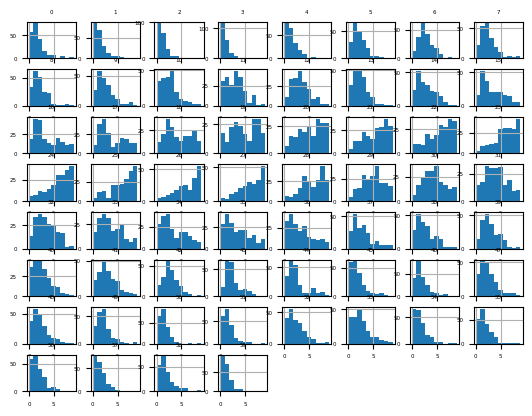

In [37]:
# visualize a uniform ordinal discretization transform of the sonar dataset 
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import KBinsDiscretizer 
from matplotlib import pyplot

# load dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(path_sonar_data, header=None) 

# retrieve just the numeric input values 
data = dataset.values[:, :-1]

# perform a uniform discretization transform of the dataset
trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform',subsample=200_000) 
data = trans.fit_transform(data)

# convert the array back to a dataframe 
dataset = DataFrame(data)

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4) 
[x.title.set_size(4)  for  x  in  fig.ravel()]

# show the plot 
pyplot.show()

Running the example transforms the dataset and plots histograms of each input variable. We can see that the shape of the histograms generally matches the shape of the raw dataset, although in this case, each variable has a fixed number of 10 values or ordinal groups.

Next, let’s evaluate the same KNN model as the previous section, but in this case on a uniform discretization transform of the dataset. The complete example is listed below.

In [38]:
# evaluate knn on the sonar dataset with uniform ordinal discretization transform 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import KBinsDiscretizer 
from sklearn.pipeline import Pipeline

# load dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(path_sonar_data, header=None)
data = dataset.values

# separate into input and output columns 
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y  =  LabelEncoder().fit_transform(y.astype('str')) 

# define the pipeline
trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform',subsample=200_000)
model  =  KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)]) 

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.829 (0.079)


Running the example, we can see that the uniform discretization transform results in a lift in performance from 79.7 percent accuracy without the transform to about 82.7 percent with the transform.

#### k-Means Discretization Transform

A k-means discretization transform will attempt to fit k clusters for each input variable and then assign each observation to a cluster. Unless the empirical distribution of the variable is complex, the number of clusters is likely to be small, such as 3-to-5. We can apply the k-means discretization transform using the KBinsDiscretizer class and setting the strategy argument to ‘kmeans’. We must also set the desired number of bins set via the n bins argument; in this case, we will use three. Once defined, we can call the fit transform() function and pass it to our dataset to create a discretized transformed version of our dataset.

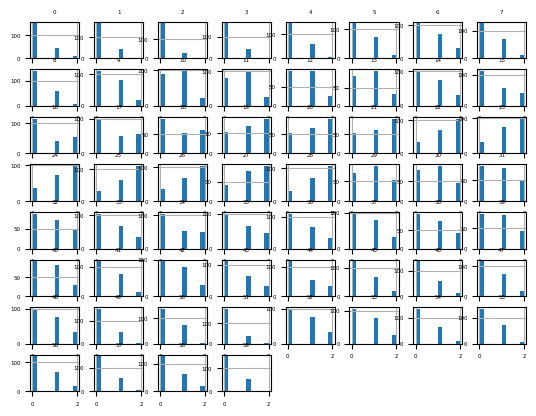

In [39]:
# visualize a k-means ordinal discretization transform of the sonar dataset 
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import KBinsDiscretizer 
from matplotlib import pyplot

# load dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(path_sonar_data, header=None)

# retrieve just the numeric input values
data = dataset.values[:, :-1]

# perform a k-means discretization transform of the dataset
trans = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans',subsample=200_000) 
data = trans.fit_transform(data)

# convert the array back to a dataframe 
dataset = DataFrame(data)

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4) 
[x.title.set_size(4) for x in fig.ravel()]

# show the plot 
pyplot.show()

Running the example transforms the dataset and plots histograms of each input variable. We can see that the observations for each input variable are organized into one of three groups, some of which appear to be quite even in terms of observations, and others much less so.

Next, let’s evaluate the same KNN model as the previous section, but in this case on a k-means discretization transform of the dataset. The complete example is listed below.

In [40]:
#evaluate knn on the sonar dataset with k-means ordinal discretization transform 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import KBinsDiscretizer 
from sklearn.pipeline import Pipeline

# load dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(path_sonar_data, header=None)
data = dataset.values

# separate into input and output columns 
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y  =  LabelEncoder().fit_transform(y.astype('str'))

# define the pipeline
trans = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans',subsample=200_000)
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)]) 

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.821 (0.089)


Running the example, we can see that the k-means discretization transform results in a lift in performance from 79.7 percent accuracy without the transform to about 81.4 percent with the transform, although slightly less than the uniform distribution in the previous section.

#### Quantile Discretization Transform

A quantile discretization transform will attempt to split the observations for each input variable into k groups, where the number of observations assigned to each group is approximately equal. Unless there are a large number of observations or a complex empirical distribution, the number of bins must be kept small, such as 5-10. We can apply the quantile discretization transform using the KBinsDiscretizer class and setting the strategy argument to ‘quantile’. We must also set the desired number of bins set via the n bins argument; in this case, we will use 10.

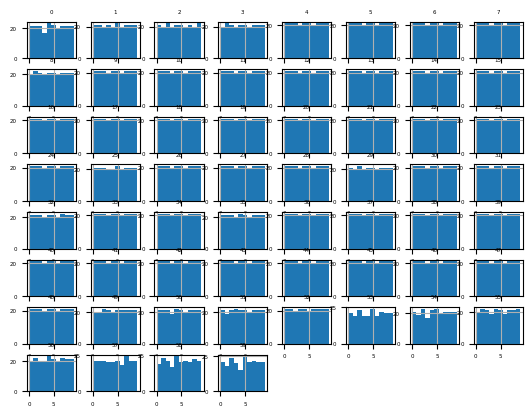

In [41]:
# visualize a quantile ordinal discretization transform of the sonar dataset 
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import KBinsDiscretizer 
from matplotlib import pyplot

# load dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(path_sonar_data, header=None)

# retrieve just the numeric input values 
data = dataset.values[:, :-1]

# perform a quantile discretization transform of the dataset
trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile',subsample=200_000) 
data = trans.fit_transform(data)

# convert the array back to a dataframe 
dataset = DataFrame(data)

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4) 
[x.title.set_size(4)  for  x  in  fig.ravel()]

# show the plot 
pyplot.show()

Running the example transforms the dataset and plots histograms of each input variable. We can see that the histograms all show a uniform probability distribution for each input variable, where each of the 10 groups has the same number of observations.

Next, let’s evaluate the same KNN model as the previous section, but in this case, on a quantile discretization transform of the raw dataset. The complete example is listed below.

In [42]:
# evaluate knn on the sonar dataset with quantile ordinal discretization transform 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import KBinsDiscretizer 
from sklearn.pipeline import Pipeline

# load dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(path_sonar_data, header=None)
data = dataset.values

# separate into input and output columns 
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y  =  LabelEncoder().fit_transform(y.astype('str')) 

# define the pipeline
trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile',subsample=200_000)
model  =  KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)]) 

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.840 (0.072)


Running the example, we can see that the uniform transform results in a lift in performance from 79.7 percent accuracy without the transform to about 84.0 percent with the transform, better than the uniform and k-means methods of the previous sections.

We chose the number of bins as an arbitrary number; in this case, 10. This hyperparameter can be tuned to explore the effect of the resolution of the transform on the resulting skill of the model. The example below performs this experiment and plots the mean accuracy for different n bins values from two to 10.

>2 0.822 (0.077)
>3 0.878 (0.053)
>4 0.836 (0.083)
>5 0.840 (0.069)
>6 0.843 (0.069)
>7 0.854 (0.071)
>8 0.838 (0.077)
>9 0.841 (0.069)
>10 0.840 (0.072)


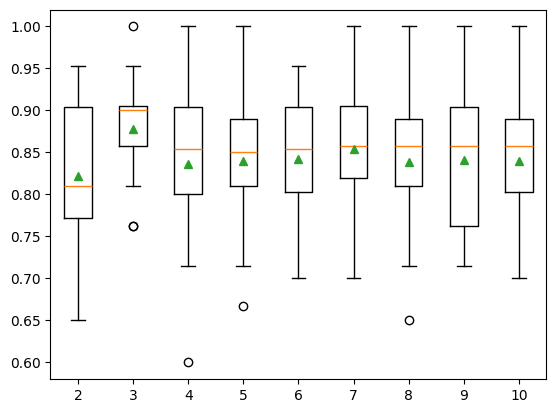

In [43]:
# explore number of discrete bins on classification accuracy 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import KBinsDiscretizer 
from sklearn.preprocessing import LabelEncoder 
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get the dataset 
def get_dataset():
    # load dataset
    path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
    dataset = read_csv(path_sonar_data, header=None)
    data = dataset.values
    # separate into input and output columns 
    X, y = data[:, :-1], data[:, -1]
    # ensure inputs are floats and output is an integer label
    X = X.astype('float32')
    y = LabelEncoder().fit_transform(y.astype('str')) 
    return X, y

# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(2,11):
        # define the pipeline
        trans = KBinsDiscretizer(n_bins=i, encode='ordinal', strategy='quantile',subsample=200_000) 
        model = KNeighborsClassifier()
        models[str(i)] = Pipeline(steps=[('t', trans), ('m', model)]) 
    return models

# evaluate a given model using cross-validation 
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
    return scores

# get the dataset
X, y = get_dataset()

# get the models to evaluate 
models = get_models()

# evaluate the models and store results 
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y) 
    results.append(scores) 
    names.append(name)
    print('>%s %.3f (%.3f)'  % (name, mean(scores), std(scores))) 

# plot model performance for comparison 
pyplot.boxplot(results, tick_labels=names, showmeans=True)
pyplot.show()

Running the example reports the mean classification accuracy for each value of the n bins
argument.

In this case, we can see that surprisingly smaller values resulted in better accuracy, with values such as three achieving an accuracy of about 86.7 percent.

Box and whisker plots are created to summarize the classification accuracy scores for each number of discrete bins on the dataset. We can see a small bump in accuracy at three bins and the scores drop and remain flat for larger values. The results highlight that there is likely some benefit in exploring different numbers of discrete bins for the chosen method to see if better performance can be achieved.

## How to Derive New Input Variables

🔷 **Purpose of Polynomial Features**
- Helps expose **non-linear interactions** between input variables.
- Enables **simpler models** to capture complex relationships.
- Often improves performance of models like **Linear Regression**, **Logistic Regression**.
- Useful in **numerical input task**s, especially **regression problems**.

🔷 **Types of Polynomial Features**
- **Power Features**: x², x³,... of existing features.
- **Interaction Features**: x₁ × x₂, x₁ × x₃,...
- Includes **bias term (1.0)**.

🔷 **Benefits**
- Makes **patterns more detectable** for some ML models.
- Helps **linear models** behave like non-linear ones (e.g., Polynomial Regression).
- May improve **prediction accuracy**.

🔷 **Trade-offs**
- **Exponentially increases** the number of features.<br>
o	e.g., Degree 3 on Sonar dataset: From 61 to **39,711** features.<br>
- Risk of **overfitting**, especially at high degrees.
- Increases **computational cost** and complexity.

🔷 **scikit-learn Tool: PolynomialFeatures**
- Part of sklearn.preprocessing.
- **Key parameters**:<br>
o	**degree** – sets the max power (default=2).<br>
o	**include_bias** – includes constant feature (default=True).<br>
o	**interaction_only** – disables powers, only keeps interactions (default=False).

🔷 **Choosing Polynomial Degree**
- Degree 1 = original data (no change).
- Higher degree → exponentially more features:<br>
o	Degree 2: manageable.<br>
o	Degree 3+: large risk of **feature explosion**.<br>
- Use as a **hyperparameter** – tune for optimal performance.
- Degree 4+ often leads to **diminishing returns or overfitting**.

🔷 **Best Practices**
- Use **low-degree polynomials** (2 or 3) unless data is very small.
- Combine with **scaling (power/Gaussian transforms)** for better results.
- **Visualize** accuracy results (e.g., boxplots) to detect overfitting trends.
- Always validate with **cross-validation** due to stochastic variance.

#### Polynomial Feature Transform

🔷 **Types of Polynomial Features**
- **Power Features**: x², x³,... of existing features.
- **Interaction Features**: x₁ × x₂, x₁ × x₃,...
- Includes **bias term (1.0)**.

The polynomial features transform is available in the scikit-learn Python machine learning library via the PolynomialFeatures class. <br>The features created include:
- The bias (the value of 1.0)
- Values raised to a power for each degree (e.g. x1, x2, x3,…)
- Interactions between all pairs of features (e.g. x1 × x2, x1 × x3,…)

For example, with two input variables with values 2 and 3 and a degree of 2, the features created would be:
- 1 (the bias)
- 2^1 = 2
- 3^1 = 3
- 2^2 = 4
- 3^2 = 9
- 2 × 3 = 6

In [44]:
# demonstrate the types of features created 
from numpy import asarray
from sklearn.preprocessing import PolynomialFeatures 

# define the dataset
data = asarray([[2,3],[2,3],[2,3]]) 
print(data)

# perform a polynomial features transform of the dataset 
trans = PolynomialFeatures(degree=2)
data = trans.fit_transform(data)

print(data)

[[2 3]
 [2 3]
 [2 3]]
[[1. 2. 3. 4. 6. 9.]
 [1. 2. 3. 4. 6. 9.]
 [1. 2. 3. 4. 6. 9.]]


Running the example first reports the raw data with two features (columns) and each feature has the same value, either 2 or 3. Then the polynomial features are created, resulting in six features, matching what was described above.

#### Sonar Dataset

The sonar dataset is a standard machine learning dataset for binary classification. It involves 60 real-valued inputs and a two-class target variable. There are 208 examples in the dataset and the classes are reasonably balanced. A baseline classification algorithm can achieve a classification accuracy of about 53.4 percent using repeated stratified 10-fold cross-validation. Top performance on this dataset is about 88 percent using repeated stratified 10-fold cross- validation. The dataset describes sonar returns of rocks or simulated mines. 

(208, 61)


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


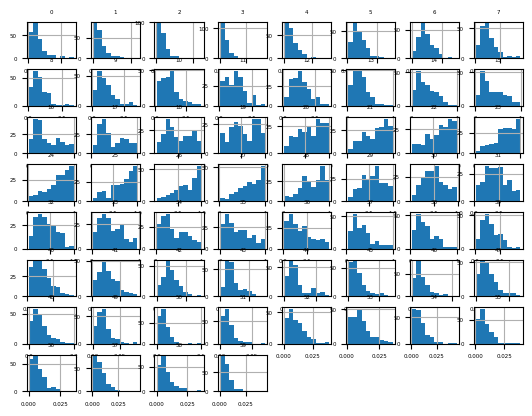

In [45]:
# load and summarize the sonar dataset 
from pandas import read_csv
from matplotlib import pyplot 

# load dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(path_sonar_data, header=None) 

# summarize the shape of the dataset 
print(dataset.shape)

# summarize each variable 
display(dataset.describe())

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4) 
[x.title.set_size(4) for x in fig.ravel()]
# show the plot 
pyplot.show()

Next, let’s fit and evaluate a machine learning model on the raw dataset. <br>We will use a k-nearest neighbor algorithm with default hyperparameters and evaluate it using repeated stratified k-fold cross-validation. <br>The complete example is listed below.

In [46]:
# evaluate knn on the raw sonar dataset 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder 

# load dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(path_sonar_data, header=None) 
data = dataset.values

# separate into input and output columns 
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y  =  LabelEncoder().fit_transform(y.astype('str')) 

# define and configure the model
model = KNeighborsClassifier()

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.797 (0.073)


#### Polynomial Feature Transform Example

In [47]:
# visualize a polynomial features transform of the sonar dataset 
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import PolynomialFeatures 

# load dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(path_sonar_data, header=None) 

# retrieve just the numeric input values 
data = dataset.values[:, :-1]

# perform a polynomial features transform of the dataset 
trans = PolynomialFeatures(degree=3)
data = trans.fit_transform(data)

# convert the array back to a dataframe 
dataset = DataFrame(data)

# summarize 
print(dataset.shape)

(208, 39711)


Running the example performs the polynomial features transform on the sonar dataset. We can see that our features increased from 61 (60 input features) for the raw dataset to 39,711 features (39,710 input features).

Next, let’s evaluate the same KNN model as the previous section, but in this case on a polynomial features transform of the dataset. The complete example is listed below.

In [48]:
# evaluate knn on the sonar dataset with polynomial features transform 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.pipeline import Pipeline

# load dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(path_sonar_data, header=None) 
data = dataset.values

# separate into input and output columns 
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y  =  LabelEncoder().fit_transform(y.astype('str')) 

# define the pipeline
trans = PolynomialFeatures(degree=3) 
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)]) 

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.800 (0.077)


Running the example, we can see that the polynomial features transform results in a lift in performance from 79.7 percent accuracy without the transform to about 80.0 percent with the transform.

#### Effect of Polynomial Degree

The degree of the polynomial dramatically increases the number of input features. To get an idea of how much this impacts the number of features, we can perform the transform with a range of different degrees and compare the number of features in the dataset. The complete example is listed below.

Degree: 1, Features: 61
Degree: 2, Features: 1891
Degree: 3, Features: 39711
Degree: 4, Features: 635376
Degree: 5, Features: 8259888


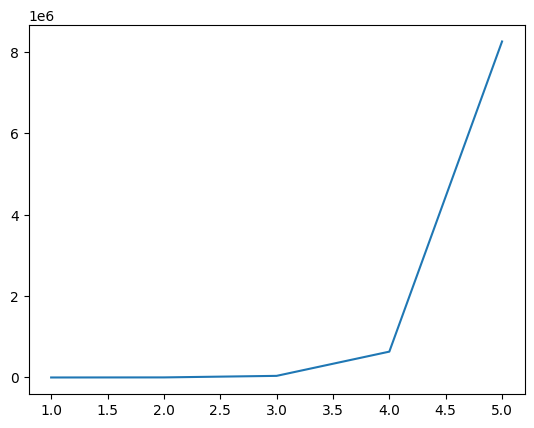

In [49]:
# compare the effect of the degree on the number of created features 
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures 
from matplotlib import pyplot

# get the dataset
def get_dataset(filename):
    # load dataset
    dataset = read_csv(filename, header=None) 
    data = dataset.values
    # separate into input and output columns 
    X, y = data[:, :-1], data[:, -1]
    # ensure inputs are floats and output is an integer label
    X = X.astype('float32')
    y = LabelEncoder().fit_transform(y.astype('str')) 
    return X, y


# define dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
X, y = get_dataset(path_sonar_data)

# calculate change in number of features 
num_features = list()
degress = [i for i in range(1, 6)] 

for d in degress:
    # create transform
    trans = PolynomialFeatures(degree=d) 
    
    # fit and transform
    data = trans.fit_transform(X) 
    
    # record number of features
    num_features.append(data.shape[1]) 
    
    # summarize
    print('Degree: %d, Features: %d' % (d, data.shape[1])) 

# plot degree vs number of features
pyplot.plot(degress, num_features) 
pyplot.show()

Running the example first reports the degree from 1 to 5 and the number of features in the dataset. We can see that a degree of 1 has no effect and that the number of features dramatically increases from 2 through to 5. This highlights that for anything other than very small datasets, a degree of 2 or 3 should be used to avoid a dramatic increase in input variables.

More features may result in more overfitting, and in turn, worse results. It may be a good idea to treat the degree for the polynomial features transform as a hyperparameter and test different values for your dataset. 

The example below explores degree values from 1 to 4 and evaluates their effect on classification accuracy with the chosen model.

>1 0.797 (0.073)
>2 0.793 (0.085)


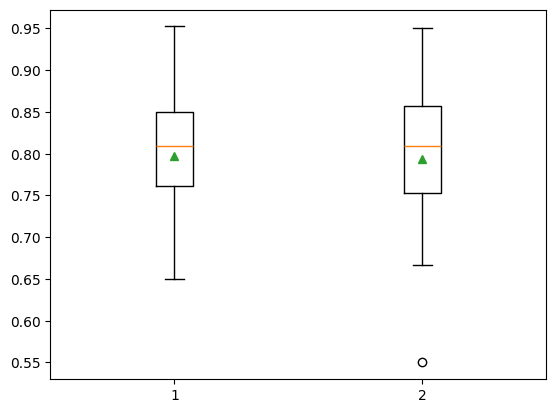

In [50]:
# explore the effect of degree on accuracy for the polynomial features transform 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline 
from matplotlib import pyplot

# get the dataset
def get_dataset(filename):
    # load dataset
    dataset = read_csv(filename, header=None) 
    data = dataset.values
    # separate into input and output columns 
    X, y = data[:, :-1], data[:, -1]
    # ensure inputs are floats and output is an integer label
    X = X.astype('float32')
    y = LabelEncoder().fit_transform(y.astype('str')) 
    return X, y

# get a list of models to evaluate 
def get_models():
    models = dict()
    for d in range(1,3):
        # define the pipeline
        trans = PolynomialFeatures(degree=d) 
        model = KNeighborsClassifier()
        models[str(d)] = Pipeline(steps=[('t', trans), ('m', model)]) 
    return models

# evaluate a given model using cross-validation 
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
    return scores

# define dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
X, y = get_dataset(path_sonar_data) 

# get the models to evaluate 
models = get_models()

# evaluate the models and store results 
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y) 
    results.append(scores) 
    names.append(name)
    print('>%s %.3f (%.3f)'  % (name, mean(scores), std(scores))) 

# plot model performance for comparison 
pyplot.boxplot(results, tick_labels=names, showmeans=True) 
pyplot.show()

**/!\ Degrees 3 and 4 not taken into account. Too computationnally expensive for my laptop configuration !**

Running the example reports the mean classification accuracy for each polynomial degree.

In this case, we can see that performance is generally worse than no transform (degree 1) except for a degree 3. It might be interesting to explore scaling the data before or after performing the transform to see how it impacts model performance.

Box and whisker plots are created to summarize the classification accuracy scores for each polynomial degree. We can see that performance remains flat, perhaps with the first signs of overfitting with a degree of 4.